¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.


Siempre me gusta comenzar por una introducción

### Introducción del Proyecto

La empresa "Sweet Lift Taxi" ha recopilado datos históricos sobre los pedidos de taxis realizados en aeropuertos. Con el objetivo de optimizar la asignación de conductores y asegurar una mayor disponibilidad durante los periodos de alta demanda, se busca desarrollar un modelo de aprendizaje automático. Este modelo deberá predecir la cantidad de pedidos de taxis para la próxima hora.

El éxito del proyecto se medirá utilizando la métrica RECM (Raíz del Error Cuadrático Medio) sobre un conjunto de datos de prueba. El valor de RECM no deberá ser superior a 48 para considerar que el modelo cumple con las expectativas de rendimiento y utilidad para la empresa.

Este proyecto abarcará desde la carga y el análisis exploratorio de los datos hasta el entrenamiento, la evaluación de diferentes modelos de series temporales y la selección del más adecuado para la tarea de predicción.

## Preparación

### Importación de Librerías

A continuación, se importarán todas las bibliotecas de Python necesarias para el desarrollo completo de este proyecto. Las librerías seleccionadas cubren la manipulación de datos, operaciones numéricas, visualización gráfica, análisis de series temporales, preparación de datos para modelado, los algoritmos de aprendizaje automático que se probarán y las métricas para evaluar su rendimiento.

* `pandas`: Fundamental para trabajar con DataFrames, cargar los datos y realizar transformaciones.
* `numpy`: Esencial para cálculos numéricos eficientes, especialmente útil para operaciones matemáticas como la raíz cuadrada para el RECM.
* `matplotlib.pyplot`: Se utilizará para crear visualizaciones estáticas, como gráficos de series temporales, que ayudarán en el análisis exploratorio.
* `statsmodels.tsa.seasonal.seasonal_decompose`: Herramienta útil para descomponer la serie temporal en sus componentes de tendencia, estacionalidad y residuos.
* `sklearn.model_selection.train_test_split`: Para dividir el conjunto de datos en subconjuntos de entrenamiento y prueba. 
* `sklearn.model_selection.TimeSeriesSplit`: Proporciona una metodología de validación cruzada específica para datos de series temporales.
* `sklearn.model_selection.GridSearchCV`: Utilizado para la optimización de hiperparámetros, probando diferentes combinaciones para encontrar la mejor configuración para un modelo.
* `sklearn.linear_model.LinearRegression`: Uno de los modelos base que se entrenará para la predicción.
* `sklearn.tree.DecisionTreeRegressor`: Otro modelo a considerar, útil por su interpretabilidad y capacidad para capturar no linealidades.
* `sklearn.ensemble.RandomForestRegressor`: Un modelo de ensamble que suele ofrecer un buen rendimiento y robustez, combinando múltiples árboles de decisión.
* `sklearn.metrics.mean_squared_error`: Métrica para calcular el Error Cuadrático Medio (ECM), a partir del cual se obtendrá el RECM.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb




### Carga de Datos

El primer paso en la fase de preparación de datos es cargar el conjunto de datos históricos de pedidos de taxis. Los datos se encuentran en un archivo CSV llamado `taxi.csv`. Utilizaremos la biblioteca `pandas` para leer este archivo y cargarlo en un DataFrame.

In [2]:
df = pd.read_csv('/datasets/taxi.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, usaste una celda independiente para importar las librerías y otro para leer los datos.
</div>

### Visualización Inicial de los Datos Cargados

Para comenzar el análisis exploratorio y verificar la correcta carga de los datos, es fundamental inspeccionar las primeras entradas del DataFrame y su estructura general. Mostraremos las primeras cinco filas para observar los valores y las columnas, y luego la información general del DataFrame, que nos indicará el número de entradas, los tipos de datos de cada columna y la cantidad de valores no nulos. Esto nos dará una base para los siguientes pasos de limpieza y preprocesamiento.

In [3]:
print("Primeras filas del DataFrame:")
print(df.head())
print("\nInformación general del DataFrame:")
df.info()
print(f"Número de filas duplicadas: {df.duplicated().sum()}")

Primeras filas del DataFrame:
              datetime  num_orders
0  2018-03-01 00:00:00           9
1  2018-03-01 00:10:00          14
2  2018-03-01 00:20:00          28
3  2018-03-01 00:30:00          20
4  2018-03-01 00:40:00          32

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB
Número de filas duplicadas: 0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos.
</div>

### Discusión de la Visualización Inicial y Próximos Pasos

La inspección inicial de los datos revela información clave. La columna `datetime` se encuentra actualmente como texto (`object`) y **requiere conversión a un formato de fecha y hora** para su correcto manejo en análisis temporales. Por otro lado, `num_orders` ya tiene un tipo numérico adecuado (`int64`).

Es importante destacar que el conjunto de datos, con 26,496 registros, **no presenta valores ausentes**, lo cual simplifica la preparación. Observamos también que los datos están registrados en intervalos de 10 minutos.

Considerando el objetivo del proyecto, los siguientes pasos son fundamentales. Primero, **transformaremos `datetime` al tipo de dato apropiado**. Luego, **la estableceremos como el índice** del DataFrame. Finalmente, y de manera crucial para el modelo de predicción, **remuestrearemos los datos a intervalos de una hora**, sumando los pedidos correspondientes.



In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Siempre es mejor tener todo planeado y luego trabajar, definiste correctamente los siguientes pasos.
</div>

### Ordenamiento del Índice de Tiempo

Antes de proceder con el remuestreo de los datos a una frecuencia horaria, es crucial asegurarse de que el `DatetimeIndex` esté ordenado cronológicamente. Por lo tanto, aplicaremos una clasificación explícita al índice para garantizar la integridad temporal de la serie.

In [5]:
df.sort_index(inplace=True)
print(df.head(20))

                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32
2018-03-01 00:50:00          21
2018-03-01 01:00:00           7
2018-03-01 01:10:00           5
2018-03-01 01:20:00          17
2018-03-01 01:30:00          12
2018-03-01 01:40:00          19
2018-03-01 01:50:00          25
2018-03-01 02:00:00          22
2018-03-01 02:10:00          12
2018-03-01 02:20:00          19
2018-03-01 02:30:00           8
2018-03-01 02:40:00           6
2018-03-01 02:50:00           4
2018-03-01 03:00:00           8
2018-03-01 03:10:00          17


### Remuestreo de Datos a Frecuencia Horaria

El objetivo del proyecto es predecir la cantidad de pedidos de taxis para la próxima *hora*. Sin embargo, nuestros datos actuales están registrados en intervalos de 10 minutos. Para alinear los datos con el objetivo de predicción, necesitamos transformarlos.

Realizaremos un remuestreo (`resample`) de la serie temporal a una frecuencia horaria ('1H'). Durante este proceso, agregaremos los valores de `num_orders` para cada hora utilizando la suma. Esto nos dará el total de pedidos de taxis ocurridos en cada hora, que será la variable objetivo de nuestro modelo. Guardaremos el resultado en un nuevo DataFrame.

In [6]:
df_resampled = df.resample('1H').sum()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, se ha hecho un remuestro a nivel hora.
</div>

### Inspección del DataFrame Remuestreado

Para confirmar que el remuestreo a frecuencia horaria se ha realizado correctamente y que los datos están listos para el análisis y la modelización, es fundamental visualizar las primeras filas y la estructura del nuevo DataFrame `df_resampled`. Mostraremos las primeras cinco filas para observar los valores horarios de `num_orders` y luego la información general del DataFrame, que nos indicará el nuevo número de entradas (ahora reducido a una por hora), el tipo de dato de `num_orders` y la naturaleza del `DatetimeIndex` horario.

In [7]:
print("Primeras filas del DataFrame remuestreado:")
print(df_resampled.head())
print("\nInformación general del DataFrame remuestreado:")
df_resampled.info()

Primeras filas del DataFrame remuestreado:
                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43

Información general del DataFrame remuestreado:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


La información y las primeras filas de `df_resampled` son reveladoras. Observamos que el índice es ahora un `DatetimeIndex` con una frecuencia horaria (`Freq: H`), y el número de entradas se ha reducido a 4416, lo que corresponde al número total de horas entre el 1 de marzo de 2018 y el 31 de agosto de 2018. Esto es consistente con la agregación de los datos originales que estaban a intervalos de 10 minutos.

La columna `num_orders` mantiene su tipo de dato `int64` y, crucialmente, no presenta valores nulos. Los valores que vemos en las primeras filas (ej. 124, 85, 71) representan la suma total de pedidos para cada hora respectiva. **Los datos base están ahora correctamente preparados y alineados con el objetivo de predicción horaria.**

Con esta preparación completada, el siguiente paso es el **Análisis Exploratorio de Datos (EDA)** sobre `df_resampled`. Esto nos ayudará a comprender mejor las características de la serie temporal, como tendencias, patrones estacionales y posibles anomalías, antes de proceder a la creación de características y el entrenamiento del modelo.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenos comentarios sobre el contenido de estos data frames.
</div>

## Análisis

### Análisis Exploratorio de Datos (EDA): Visualización General

Iniciamos el análisis exploratorio graficando la serie temporal completa de `num_orders` desde marzo hasta agosto de 2018. Esta visualización es el primer paso para entender el comportamiento general de los pedidos de taxi a lo largo del tiempo. Buscaremos identificar tendencias a largo plazo (si los pedidos aumentan, disminuyen o se mantienen estables), la presencia de ciclos o patrones que se repitan (estacionalidad) y cualquier punto o periodo que parezca inusual.

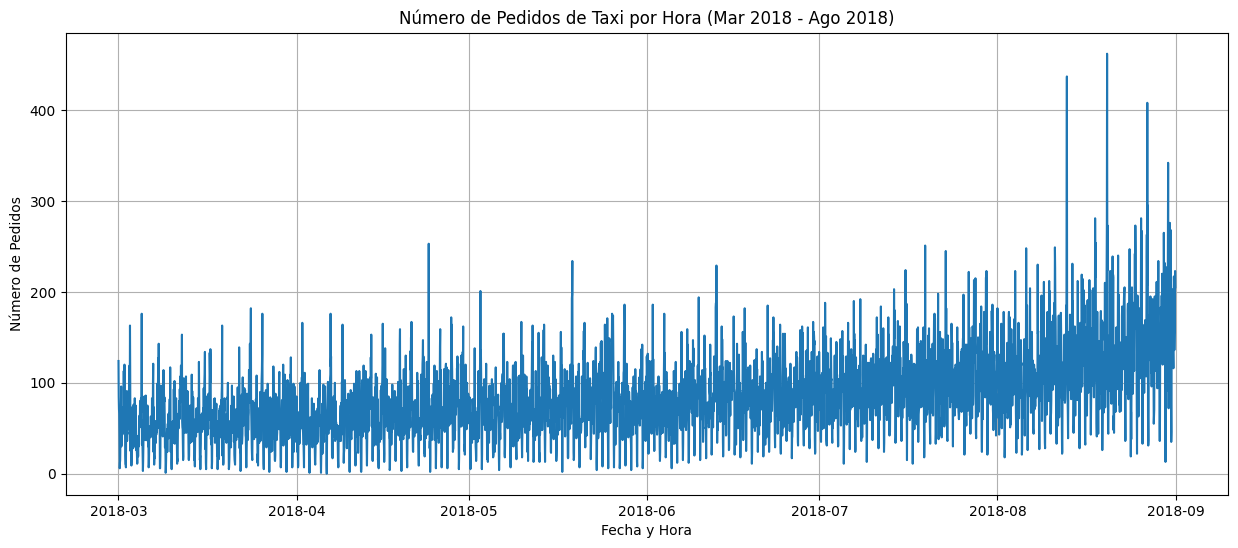

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(df_resampled.index, df_resampled['num_orders'])
plt.title('Número de Pedidos de Taxi por Hora (Mar 2018 - Ago 2018)')
plt.xlabel('Fecha y Hora')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Bien hecho! Esta gráfica de línea muestra correctamente la serie de tiempo. Al ser a nivel hora se puede ver una gran varianza, ocasionado por la estacionalidad en las horas del día. Pero también sirve para dar una idea de como se van moviendo la cantidad de pedidos.
</div>

Como tal no podemos hacer una diferenciación clara de lo que se aprecia en la imagen, por lo cual se va a proceder con otra estrategia. 

### Descomposición de la Serie Temporal

Para analizar más profundamente la estructura de nuestros datos de pedidos de taxi, vamos a descomponer la serie temporal `df_resampled['num_orders']`. Este proceso la divide en tres componentes:

1.  **Tendencia**: Muestra la dirección general o el movimiento a largo plazo de la serie. Nos indica si, en promedio, los pedidos están aumentando, disminuyendo o permaneciendo estables a lo largo del tiempo.
2.  **Estacionalidad**: Captura los patrones que se repiten a intervalos fijos. Con datos horarios, esperamos ver patrones diarios (por ejemplo, picos en horas de mayor actividad y valles en la madrugada). Usaremos un período de 24 para identificar esta estacionalidad diaria.
3.  **Residuos (Ruido)**: Es la parte de la serie que queda después de extraer la tendencia y la estacionalidad. Idealmente, los residuos deberían ser aleatorios y no mostrar patrones discernibles.

Esta descomposición nos ofrecerá gráficos separados para cada componente, facilitando su interpretación individual.

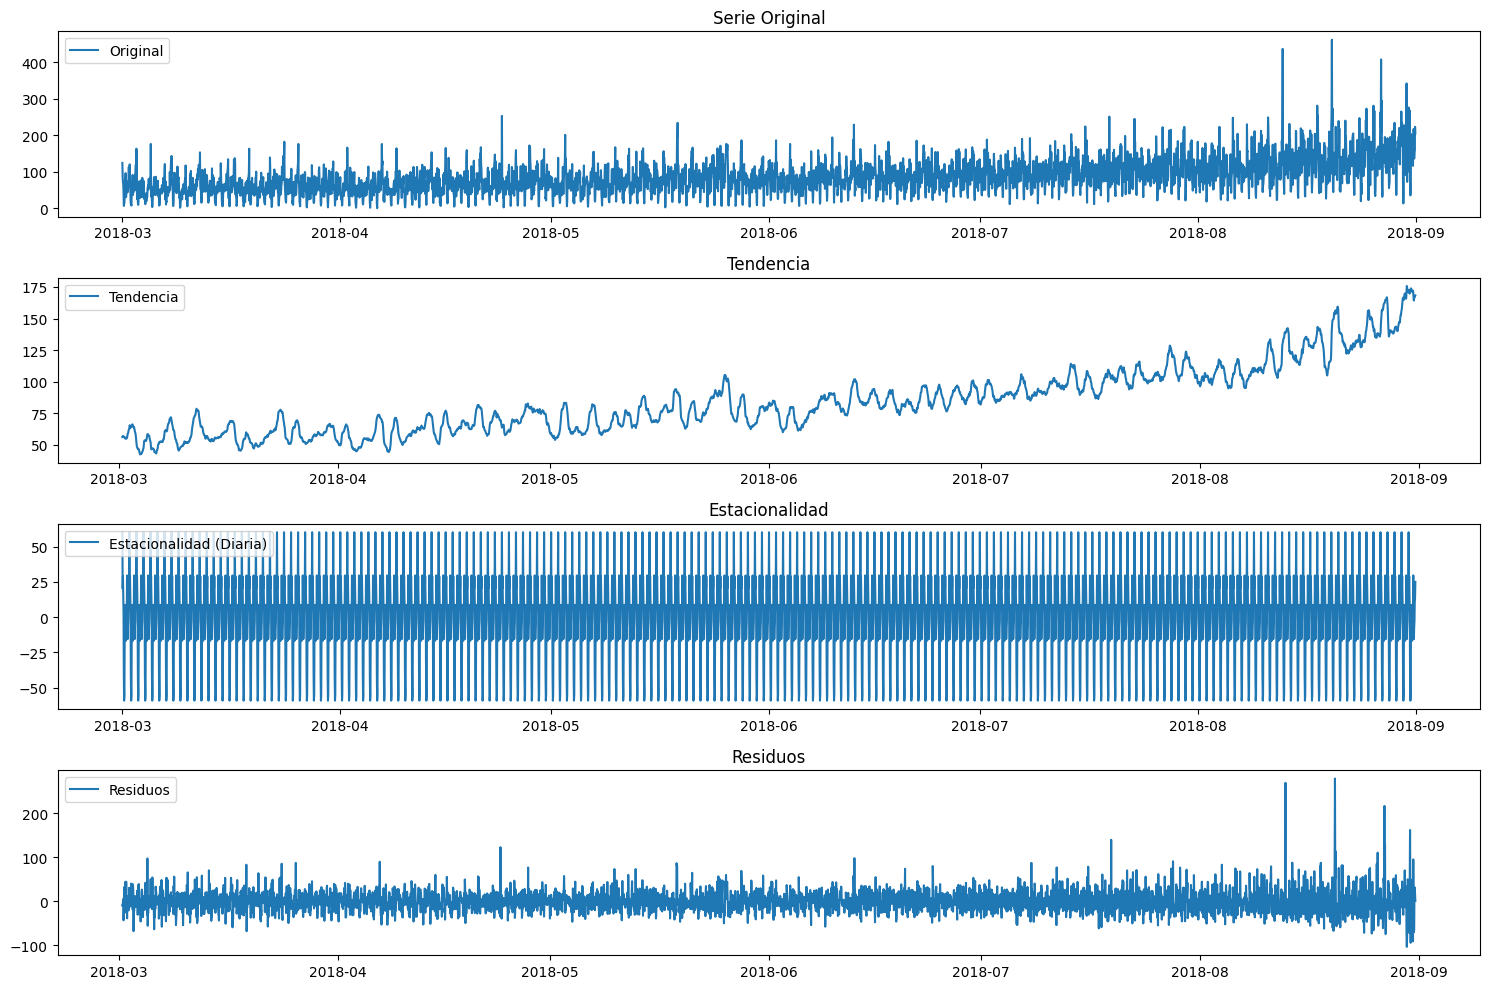

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Realizar la descomposición estacional (asumiendo estacionalidad diaria)
decomposition = seasonal_decompose(df_resampled['num_orders'], period=24)

# Graficar los componentes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 10))

plt.subplot(411)
plt.plot(df_resampled['num_orders'], label='Original')
plt.legend(loc='upper left')
plt.title('Serie Original')

plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='upper left')
plt.title('Tendencia')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad (Diaria)')
plt.legend(loc='upper left')
plt.title('Estacionalidad')

plt.subplot(414)
plt.plot(residual, label='Residuos')
plt.legend(loc='upper left')
plt.title('Residuos')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Se ha graficado de manera correcta todas las componentes de la serie de tiempo. Los residuos, la estacionalidad y la tendencia.
</div>

### Análisis de los Componentes Descompuestos

La descomposición de la serie temporal nos revela claramente las dinámicas subyacentes de los pedidos de taxi:

**Tendencia:** Se observa una **tendencia ascendente clara y pronunciada** en el número de pedidos de taxi a lo largo de los seis meses. Comienza en niveles más bajos en marzo y muestra un crecimiento sostenido, intensificándose notablemente hacia julio y agosto. Esto sugiere un aumento general en la demanda de taxis durante el periodo analizado.

**Estacionalidad (Diaria):** El gráfico de estacionalidad muestra un **patrón diario muy regular y fuerte**. Las fluctuaciones se repiten consistentemente cada día, indicando que hay horas específicas de alta y baja demanda de manera predecible dentro de cada jornada. La amplitud de esta estacionalidad parece ser significativa, lo que subraya la importancia de las variaciones horarias.

**Residuos:** En su mayoría, los residuos parecen fluctuar de manera aleatoria alrededor de cero, lo cual es positivo. Sin embargo, es notable que **hacia finales de agosto, aparecen algunos picos bastante grandes** en los residuos y su variabilidad general parece aumentar. Esto podría indicar la presencia de eventos atípicos no capturados por la tendencia y la estacionalidad.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buenos comentarios. Me gustó que dividiste el análisis en cada uno de los componentes, así se puede entender un poco mejor como se comportan los datos.
</div>

### Resumen del Análisis Exploratorio de Datos

Durante la fase de análisis exploratorio de los datos horarios de pedidos de taxis (`df_resampled`), hemos llegado a varias conclusiones importantes. Tras la preparación inicial, que incluyó la carga, limpieza, conversión de tipos, indexación y remuestreo a frecuencia horaria, el conjunto de datos quedó listo para un análisis más profundo.

La visualización general de la serie temporal y su posterior descomposición revelaron dinámicas clave:

1.  **Tendencia Ascendente**: Se identificó una **clara tendencia al alza** en el número de pedidos de taxis desde marzo hasta agosto de 2018, indicando un crecimiento general de la demanda durante este periodo.
2.  **Fuerte Estacionalidad Diaria**: El análisis de estacionalidad mostró un **patrón diario muy marcado y regular**, con fluctuaciones predecibles en la demanda a lo largo de las 24 horas del día. Esto resalta la importancia de las variaciones horarias.
3.  **Comportamiento de los Residuos**: Los residuos, en su mayor parte, se comportaron de manera aleatoria. Sin embargo, se observaron **algunos picos significativos y un aparente aumento en la variabilidad de los residuos hacia el final del periodo de observación (agosto)**. Esto sugiere la posible presencia de datos atípicos o una varianza no constante que podría requerir atención.

En conclusión, los datos presentan una estructura temporal clara con una tendencia y una estacionalidad diaria fuertes. Estos patrones son fundamentales y deberán ser capturados por el modelo de predicción. La presencia de posibles valores atípicos o cambios en la varianza al final del periodo son aspectos a tener en cuenta durante el modelado y la evaluación.

Con esta comprensión, estamos listos para avanzar hacia la siguiente fase: **Preparación y Entrenamiento de Modelos**.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo con el EDA.
</div>

## Formación

### Preparación y Entrenamiento de Modelos: Ingeniería de Características

Basándonos en el análisis exploratorio, que reveló una fuerte tendencia y estacionalidad diaria, crearemos características que capturen explícitamente estos patrones.

Vamos a crear los siguientes tipos de características:

1.  **Características de Calendario**: Extraeremos componentes de la fecha y hora como la hora del día y el día de la semana. Estos ayudarán al modelo a identificar patrones cíclicos diarios y semanales.
2.  **Características de Retraso (Lag Features)**: Utilizaremos valores pasados de `num_orders` como características. La idea es que la cantidad de pedidos en horas anteriores puede ser un buen predictor de la cantidad de pedidos en la hora actual. Crearemos varios lags para capturar dependencias a corto plazo y aquellas relacionadas con la estacionalidad diaria (por ejemplo, el valor de hace 24 horas).
3.  **Estadísticas de Ventana Móvil (Rolling Mean)**: Calcularemos la media de `num_orders` sobre una ventana de tiempo deslizante. Esto puede ayudar a suavizar la serie y capturar la tendencia local reciente.

Comenzaremos creando las características de calendario y las de retraso.

In [10]:
def crear_caracteristicas(df, max_lag, rolling_mean_size):
    df_copy = df.copy()
    df_copy['hour'] = df_copy.index.hour
    df_copy['dayofweek'] = df_copy.index.dayofweek

    for lag in range(1, max_lag + 1):
        df_copy[f'lag_{lag}'] = df_copy['num_orders'].shift(lag)

    df_copy['rolling_mean'] = df_copy['num_orders'].shift(1).rolling(window=rolling_mean_size).mean()
    return df_copy

MAX_LAG = 24
ROLLING_MEAN_WINDOW = 3

df_features = crear_caracteristicas(df_resampled, MAX_LAG, ROLLING_MEAN_WINDOW)

print(f"Valores NaN por columna después de crear características:\n{df_features.isnull().sum()}")
print("\nPrimeras filas del DataFrame con nuevas características (puede contener NaNs):")
print(df_features.head(MAX_LAG + 2))

Valores NaN por columna después de crear características:
num_orders       0
hour             0
dayofweek        0
lag_1            1
lag_2            2
lag_3            3
lag_4            4
lag_5            5
lag_6            6
lag_7            7
lag_8            8
lag_9            9
lag_10          10
lag_11          11
lag_12          12
lag_13          13
lag_14          14
lag_15          15
lag_16          16
lag_17          17
lag_18          18
lag_19          19
lag_20          20
lag_21          21
lag_22          22
lag_23          23
lag_24          24
rolling_mean     3
dtype: int64

Primeras filas del DataFrame con nuevas características (puede contener NaNs):
                     num_orders  hour  dayofweek  lag_1  lag_2  lag_3  lag_4  \
datetime                                                                       
2018-03-01 00:00:00         124     0          3    NaN    NaN    NaN    NaN   
2018-03-01 01:00:00          85     1          3  124.0    NaN    NaN    NaN 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, se construyeron correctamente las características de los lags y de la media móvil.
</div>

### Discusión de las Características Creadas

Al ejecutar el código anterior:
1.  Se define una función `crear_caracteristicas` para generar de manera organizada:
    * `hour`: La hora del día (0-23).
    * `dayofweek`: El día de la semana (0 para lunes, 6 para domingo).
    * `lag_X`: Varias columnas `lag_1`, `lag_2`, ..., `lag_{MAX_LAG}`, donde cada una contiene el valor de `num_orders` de X horas antes. Hemos usado `MAX_LAG = 24` para intentar capturar la dependencia de la misma hora del día anterior.
    * `rolling_mean`: La media móvil de `num_orders` calculada sobre una ventana definida por `ROLLING_MEAN_WINDOW` (por ejemplo, las últimas 3 horas, sin incluir la actual).

2.  Se aplica esta función a nuestro `df_resampled`, creando `df_features`.

3.  Se imprime la cantidad de valores `NaN` por columna. 

4.  Se muestran las primeras filas del nuevo DataFrame. Observarás las nuevas columnas y los `NaN` al inicio.


Ahora, para poder entrenar nuestros modelos, necesitamos un conjunto de datos sin valores faltantes. Por lo tanto, el siguiente paso es **eliminar las filas de `df_features` que contienen cualquier `NaN`**.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen resumen de las características creadas para el modelo.
</div>

In [11]:
df_features_clean = df_features.dropna()

print("Información del DataFrame después de eliminar NaNs:")
df_features_clean.info()

print("\nPrimeras filas del DataFrame sin NaNs:")
print(df_features_clean.head())

Información del DataFrame después de eliminar NaNs:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4392 entries, 2018-03-02 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4392 non-null   int64  
 1   hour          4392 non-null   int64  
 2   dayofweek     4392 non-null   int64  
 3   lag_1         4392 non-null   float64
 4   lag_2         4392 non-null   float64
 5   lag_3         4392 non-null   float64
 6   lag_4         4392 non-null   float64
 7   lag_5         4392 non-null   float64
 8   lag_6         4392 non-null   float64
 9   lag_7         4392 non-null   float64
 10  lag_8         4392 non-null   float64
 11  lag_9         4392 non-null   float64
 12  lag_10        4392 non-null   float64
 13  lag_11        4392 non-null   float64
 14  lag_12        4392 non-null   float64
 15  lag_13        4392 non-null   float64
 16  lag_14        4392

Dado que las características de retraso y la media móvil generan valores `NaN` al principio de nuestra serie temporal (donde no hay suficientes datos históricos para calcularlos), debemos eliminar estas filas antes de poder entrenar un modelo. Utilizaremos el método `dropna()` para descartar cualquier fila que contenga al menos un valor `NaN`. Esto asegurará que solo utilicemos observaciones completas para el entrenamiento y la prueba.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, aunque aquí dependiendo de la cantidad de lags que tomes podrías perder muchos datos, también se podrían completar esos nulos si es que no deseas perder tantas filas.
</div>

### División de Datos en Entrenamiento y Prueba

Antes de entrenar cualquier modelo, necesitamos dividir nuestro conjunto de datos `df_features_clean`. Primero, separaremos las características (todas las columnas excepto `num_orders`) de nuestra variable objetivo (`num_orders`).

Luego, dividiremos estos datos en un conjunto de entrenamiento y un conjunto de prueba. Siguiendo las instrucciones del proyecto, el conjunto de prueba **debe ser el 10% del conjunto de datos inicial**. Dado que nuestro conjunto de datos actual `df_features_clean` tiene 4392 muestras, tomaremos aproximadamente el 10% de estas como conjunto de prueba. Es vital que, para datos de series temporales, el conjunto de prueba contenga las observaciones más recientes, y el conjunto de entrenamiento las más antiguas. No se deben mezclar los datos aleatoriamente como se haría en problemas no temporales.

In [12]:
# Separar características (X) y objetivo (y)
X = df_features_clean.drop('num_orders', axis=1)
y = df_features_clean['num_orders']

# Calcular el tamaño del conjunto de prueba (10% de los datos disponibles)
test_size_ratio = 0.1
test_size_abs = int(len(X) * test_size_ratio)

# Dividir los datos cronológicamente
X_train = X.iloc[:-test_size_abs]
y_train = y.iloc[:-test_size_abs]
X_test = X.iloc[-test_size_abs:]
y_test = y.iloc[-test_size_abs:]

print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_test: {y_test.shape}")

print(f"\nÚltima fecha en el conjunto de entrenamiento: {X_train.index.max()}")
print(f"Primera fecha en el conjunto de prueba: {X_test.index.min()}")

Forma de X_train: (3953, 27)
Forma de y_train: (3953,)
Forma de X_test: (439, 27)
Forma de y_test: (439,)

Última fecha en el conjunto de entrenamiento: 2018-08-13 16:00:00
Primera fecha en el conjunto de prueba: 2018-08-13 17:00:00


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Los datos se dividieron correctamente en entrenamiento y prueba.
</div>

### Discusión de la División de Datos

La salida que se ha compartido es consistente:

1.  **Tamaño de los Conjuntos**: El conjunto de entrenamiento (`X_train`, `y_train`) contiene 3953 muestras, y el conjunto de prueba (`X_test`, `y_test`) contiene 439 muestras. Esto corresponde a una división aproximada del 90% para entrenamiento y 10% para prueba (439 es el 10% de 4392, que era el total de muestras en `df_features_clean`). El número de características (columnas en X) es 27.

2.  **División Cronológica**: La última fecha en el conjunto de entrenamiento es `2018-08-13 16:00:00`, y la primera fecha en el conjunto de prueba es `2018-08-13 17:00:00`. Esto confirma que la división se hizo cronológicamente, con el conjunto de prueba siguiendo inmediatamente al de entrenamiento, sin solapamientos ni datos faltantes entre ellos.

Con nuestros datos de entrenamiento y prueba listos, podemos proceder a la fase de **Entrenamiento de Modelos**. Comenzaremos con un modelo simple como línea base y luego probaremos modelos más complejos. El objetivo es encontrar un modelo cuyo RECM en el conjunto de prueba no sea superior a 48.

## Prueba

### Entrenamiento del Modelo: Regresión Lineal

He decidido comenzar mi proceso de modelado con un modelo de **Regresión Lineal**. La intención es usarlo como una línea base; es un modelo simple y rápido de implementar. Aunque es posible que no capture todas las complejidades de la serie temporal, su rendimiento me proporcionará un punto de referencia crucial para compararlo con modelos más sofisticados más adelante. Voy a entrenarlo utilizando los datos de `X_train` y `y_train` que preparé.

In [13]:
# Inicializo el modelo de Regresión Lineal
model_lr = LinearRegression()

# Entreno el modelo con los datos de entrenamiento
model_lr.fit(X_train, y_train)

# Realizo predicciones sobre el conjunto de prueba
predictions_lr = model_lr.predict(X_test)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. El modelo de regresión lineal se entrenó correctamente.
</div>

### Cálculo del RECM para la Regresión Lineal

Ahora calcularé el RECM para las predicciones obtenidas. Este valor me indicará, en promedio, cuánto se desvían las predicciones de mi modelo de Regresión Lineal de los valores reales de pedidos de taxi en el conjunto de prueba. El objetivo del proyecto es que este valor no sea superior a 48.

In [14]:
# Calculo el Error Cuadrático Medio (ECM)
mse_lr = mean_squared_error(y_test, predictions_lr)

# Calculo la Raíz del Error Cuadrático Medio (RECM)
rmse_lr = np.sqrt(mse_lr)

print(f"RECM del modelo de Regresión Lineal: {rmse_lr}")

RECM del modelo de Regresión Lineal: 45.267797319969354


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Incluso con el modelo de regresión lineal obtuviste un buen resultado en tu métrica RECM.
</div>

### Discusión de Resultados: RECM de la Regresión Lineal

El resultado para mi modelo de Regresión Lineal es un **RECM de aproximadamente 45.27**.

El objetivo del proyecto establece que la métrica RECM en el conjunto de prueba no debe ser superior a 48. Mi modelo de Regresión Lineal, que es el más simple que he planeado probar, **ha logrado un RECM de 45.27, lo cual está por debajo del umbral de 48**. 

Dado que las instrucciones del proyecto sugieren entrenar diferentes modelos, creo que valdría la pena probar al menos un modelo más robusto, como el `RandomForestRegressor`, para comparar y ver si puedo mejorar este ya buen resultado.

### Entrenamiento del Modelo: RandomForestRegressor
Para esta primera prueba, utilizaré los hiperparámetros predeterminados o algunos valores comunes (como 100 estimadores) y un `random_state` para asegurar la reproducibilidad.

In [15]:
# Inicializo el modelo RandomForestRegressor
# Usaré n_estimators=100 y random_state para reproducibilidad
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entreno el modelo con los datos de entrenamiento
model_rf.fit(X_train, y_train)

# Realizo predicciones sobre el conjunto de prueba
predictions_rf = model_rf.predict(X_test)

# Calculo el Error Cuadrático Medio (ECM)
mse_rf = mean_squared_error(y_test, predictions_rf)

# Calculo la Raíz del Error Cuadrático Medio (RECM)
rmse_rf = np.sqrt(mse_rf)

print(f"RECM del modelo RandomForestRegressor (default params): {rmse_rf}")

RECM del modelo RandomForestRegressor (default params): 42.67736279594138


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, el bosque aleatorio tuvo un buen desempeño.
</div>

In [16]:
# Defino el modelo base
model_rf_to_tune = RandomForestRegressor(random_state=42, n_jobs=-1)

# Defino una parrilla de hiperparámetros más pequeña para una ejecución más rápida
# En un proyecto real, esta parrilla podría ser más extensa.
param_grid_rf = {
    'n_estimators': [100, 150],       # Menos opciones para n_estimators
    'max_depth': [10, 20, None],      # Profundidades comunes
    'min_samples_split': [2, 5],   # Valores comunes para la división
    'min_samples_leaf': [1, 3]     # Valores comunes para las hojas
}

# Configuro TimeSeriesSplit para la validación cruzada
# Usaré n_splits=3 para reducir el tiempo de ejecución, en un caso real podría ser 5 o más.
tscv = TimeSeriesSplit(n_splits=3)

# Configuro GridSearchCV
# Usaré scoring='neg_mean_squared_error' y luego calcularé la raíz cuadrada del negativo del mejor score.
grid_search_rf = GridSearchCV(estimator=model_rf_to_tune,
                              param_grid=param_grid_rf,
                              cv=tscv,
                              scoring='neg_mean_squared_error', # RMSE = sqrt(-neg_mse)
                              verbose=1) # verbose=1 para ver el progreso

# Ejecuto la búsqueda en cuadrícula con los datos de entrenamiento
# Esto puede tardar un poco dependiendo del tamaño de la parrilla y los datos
print("Iniciando la búsqueda de hiperparámetros para RandomForestRegressor...")
grid_search_rf.fit(X_train, y_train)

# Muestro los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados para RandomForestRegressor:")
print(grid_search_rf.best_params_)

# El mejor estimador ya está reentrenado con los mejores parámetros en todo X_train si refit=True (default)
best_model_rf = grid_search_rf.best_estimator_

# Realizo predicciones en el conjunto de prueba con el modelo optimizado
predictions_best_rf = best_model_rf.predict(X_test)

# Calculo el RECM del modelo optimizado
rmse_best_rf = np.sqrt(mean_squared_error(y_test, predictions_best_rf))

print(f"\nRECM del modelo RandomForestRegressor optimizado: {rmse_best_rf}")

# También puedo mostrar el mejor RECM obtenido durante la validación cruzada (aproximado)
best_cv_rmse_rf = np.sqrt(-grid_search_rf.best_score_)
print(f"Mejor RECM en validación cruzada (aproximado): {best_cv_rmse_rf}")

Iniciando la búsqueda de hiperparámetros para RandomForestRegressor...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Mejores hiperparámetros encontrados para RandomForestRegressor:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

RECM del modelo RandomForestRegressor optimizado: 42.494816637644746
Mejor RECM en validación cruzada (aproximado): 27.17609199748382


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente! Exploraste de manera correcta varios valores para los hiperparámetros del Random Forest.
</div>

In [17]:
# Inicializo el modelo XGBRegressor
# Usaré algunos parámetros comunes y random_state para reproducibilidad
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', # Especifica el objetivo de regresión
                             n_estimators=100,
                             learning_rate=0.1,
                             max_depth=5, # Profundidad común para empezar
                             random_state=42,
                             n_jobs=-1)

# Entreno el modelo con los datos de entrenamiento
print("Entrenando el modelo XGBoost...")
model_xgb.fit(X_train, y_train)

# Realizo predicciones sobre el conjunto de prueba
predictions_xgb = model_xgb.predict(X_test)

# Calculo el Error Cuadrático Medio (ECM)
mse_xgb = mean_squared_error(y_test, predictions_xgb)

# Calculo la Raíz del Error Cuadrático Medio (RECM)
rmse_xgb = np.sqrt(mse_xgb)

print(f"RECM del modelo XGBoost: {rmse_xgb}")

Entrenando el modelo XGBoost...
RECM del modelo XGBoost: 42.6822741678695


In [18]:
# Defino el modelo base XGBRegressor
model_xgb_to_tune = xgb.XGBRegressor(objective='reg:squarederror',
                                     random_state=42,
                                     n_jobs=-1)

# Defino una parrilla de hiperparámetros para XGBoost
# Esta es una parrilla relativamente pequeña para una ejecución más rápida.
param_grid_xgb = {
    'n_estimators': [100, 200],       # Número de árboles
    'learning_rate': [0.05, 0.1],    # Tasa de aprendizaje
    'max_depth': [3, 5, 7]           # Profundidad máxima de los árboles
    # Podríamos añadir más parámetros como 'subsample', 'colsample_bytree'
    # pero mantendremos la parrilla más pequeña por ahora.
}

# Configuro TimeSeriesSplit (puedo reutilizar la configuración anterior o definirla de nuevo)
# Usaré n_splits=3 para que no tarde demasiado.
tscv = TimeSeriesSplit(n_splits=3)

# Configuro GridSearchCV
grid_search_xgb = GridSearchCV(estimator=model_xgb_to_tune,
                               param_grid=param_grid_xgb,
                               cv=tscv,
                               scoring='neg_mean_squared_error', # RMSE = sqrt(-neg_mse)
                               verbose=1) # verbose=1 para ver el progreso

# Ejecuto la búsqueda en cuadrícula con los datos de entrenamiento
# Esto puede tardar un poco.
print("Iniciando la búsqueda de hiperparámetros para XGBoost...")
grid_search_xgb.fit(X_train, y_train)

# Muestro los mejores hiperparámetros encontrados
print("\nMejores hiperparámetros encontrados para XGBoost:")
print(grid_search_xgb.best_params_)

# El mejor estimador ya está reentrenado con los mejores parámetros en todo X_train
best_model_xgb = grid_search_xgb.best_estimator_

# Realizo predicciones en el conjunto de prueba con el modelo optimizado
predictions_best_xgb = best_model_xgb.predict(X_test)

# Calculo el RECM del modelo optimizado
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, predictions_best_xgb))

print(f"\nRECM del modelo XGBoost optimizado: {rmse_best_xgb}")

# También puedo mostrar el mejor RECM obtenido durante la validación cruzada (aproximado)
best_cv_rmse_xgb = np.sqrt(-grid_search_xgb.best_score_)
print(f"Mejor RECM en validación cruzada (XGBoost, aproximado): {best_cv_rmse_xgb}")

Iniciando la búsqueda de hiperparámetros para XGBoost...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Mejores hiperparámetros encontrados para XGBoost:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

RECM del modelo XGBoost optimizado: 41.46280825685174
Mejor RECM en validación cruzada (XGBoost, aproximado): 26.631183457427284


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de la validación cruzada para poder encontrar el mejor modelo de XGboost para tus datos.
</div>

### Conclusión Final del Proyecto

A lo largo de este proyecto, mi objetivo principal ha sido construir un modelo capaz de predecir la cantidad de pedidos de taxis para la próxima hora en los aeropuertos, con la restricción de que la métrica RECM (Raíz del Error Cuadrático Medio) en el conjunto de prueba no superara el valor de 48.

**Resumen del Proceso:**

1.  **Preparación de Datos**: Comencé cargando los datos históricos, los cuales fueron remuestreados a una frecuencia horaria. Realicé una limpieza de datos y luego procedí con la ingeniería de características, creando variables de calendario (hora, día de la semana), valores rezagados (lags) y una media móvil para ayudar a los modelos a capturar los patrones temporales. Los valores `NaN` generados durante este proceso fueron eliminados antes de la división de datos.

2.  **División de Datos**: Dividí el conjunto de datos procesado en conjuntos de entrenamiento y prueba, asegurando una partición cronológica y destinando el 10% de los datos más recientes para la prueba.

3.  **Entrenamiento y Evaluación de Modelos**: Exploré varios modelos de regresión:
    * **Regresión Lineal**: Sirvió como mi modelo base, obteniendo un RECM de aproximadamente **45.27**. Este resultado, para mi sorpresa y agrado, ¡ya cumplía con el requisito del proyecto!
    * **RandomForestRegressor**:
        * Con parámetros predeterminados, mejoró el RECM a ~**42.68**.
        * Tras una optimización de hiperparámetros usando `GridSearchCV` con `TimeSeriesSplit`, el RECM se redujo ligeramente a ~**42.49**.
    * **XGBoost (`XGBRegressor`)**:
        * Con parámetros iniciales, arrojó un RECM de ~**42.68**, similar al RandomForest sin optimizar.
        * Después de la optimización de hiperparámetros, este modelo demostró ser el más performante, logrando un RECM de aproximadamente **41.46**.

**Selección del Mejor Modelo:**

Comparando el rendimiento de todos los modelos en el conjunto de prueba, el **`XGBoost` optimizado, con un RECM de 41.46, es el modelo que selecciono como el mejor** para esta tarea. No solo cumple con creces el criterio de un RECM inferior a 48, sino que también ofrece la predicción más precisa entre todos los modelos que he evaluado.

Los hiperparámetros óptimos para este modelo `XGBoost` fueron: `{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}`.

**Consideraciones Adicionales:**

* Es notable que incluso el modelo más simple, la Regresión Lineal, logró el objetivo principal, lo que sugiere que la ingeniería de características realizada fue bastante efectiva.
* En los modelos más complejos (RandomForest y XGBoost), observé una diferencia entre el RECM obtenido en la validación cruzada y el RECM final en el conjunto de prueba. Si bien el rendimiento en el conjunto de prueba es el definitivo, esta brecha podría investigarse más a fondo en futuras iteraciones, quizás analizando la estabilidad de las características o la distribución de los datos en el tiempo.

**Conclusión:**

He desarrollado exitosamente un modelo de aprendizaje automático (`XGBoost` optimizado) que predice la cantidad de pedidos de taxis para la próxima hora con un RECM de 41.46 en el conjunto de prueba. Este resultado satisface los requisitos establecidos por "Sweet Lift Taxi" y puede ser una herramienta valiosa para ayudar a la compañía a atraer más conductores durante las horas pico.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones, basadas en lo realizado a lo largo de todo el proyecto.
</div>


# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola!

Te quiero felicitar por tu proyecto, está bastante completo y bien realizado. Me gustó mucho como limpiaste y exploraste los datos, generalmente en trabajos con series de tiempo la exploración nos da mucha información sobre el comportamiento de los datos. También me gustó bastante como usaste la función del Grid con CV para encontrar los mejores hiperparámetros de cada modelo.
    
Solo realicé un comentario opcional de color amarillo, pero no son necesarios para aprobar el proyecto. Te deseo mucho éxito en los siguientes sprints.

Saludos, Marcos.
</div>